<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Estructura
<br>
<br>

* * *

Alumno: Fernando Torres <br>
Fecha: 4 de septiembre 2024 <br>

* * *

<br>
<br>

### Introducción

En la última década, Bitcoin (BTC) se ha consolidado como una de las criptomonedas más prominentes y discutidas en el ámbito financiero y tecnológico. Su evolución de un activo relativamente desconocido a un componente significativo en los mercados globales ha suscitado un gran interés tanto en inversores como en investigadores. Dado el carácter volátil y disruptivo de Bitcoin, analizar su comportamiento histórico puede ofrecer valiosas perspectivas sobre su dinámica de precios y sus patrones subyacentes. Este análisis tiene el potencial de informar estrategias de inversión, prever futuros movimientos de precios y comprender mejor la influencia de factores externos sobre el mercado de criptomonedas.
### Objetivo

El objetivo de este estudio es analizar la evolución del precio de Bitcoin en los últimos 10 años utilizando técnicas de series de tiempo. Este análisis tiene como meta identificar patrones, tendencias y posibles anomalías en los datos históricos. Además, se pretende modelar el comportamiento del precio para prever futuros movimientos y proporcionar recomendaciones basadas en estos hallazgos. La intención es contribuir al entendimiento profundo de los factores que influyen en la volatilidad del BTC y ofrecer herramientas analíticas que puedan ser utilizadas para la toma de decisiones en contextos de inversión y evaluación de riesgos.
### Definición del Problema

El problema central de este análisis radica en la complejidad de la predicción del precio de Bitcoin debido a su alta volatilidad y la influencia de múltiples factores externos como noticias económicas, eventos geopolíticos, cambios regulatorios y el sentimiento del mercado. A lo largo de los últimos 10 años, el precio de Bitcoin ha experimentado fluctuaciones significativas que reflejan tanto el auge de su popularidad como las incertidumbres inherentes a las criptomonedas. La dificultad consiste en modelar y entender estos patrones para hacer predicciones precisas y confiables. Por lo tanto, se requiere una metodología robusta para el análisis de series de tiempo que pueda capturar la dinámica del precio de BTC, identificar ciclos y correlaciones, y ofrecer proyecciones que ayuden a mitigar la incertidumbre y guiar las decisiones financieras.

Importamos las librerias necesarias

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from statsforecast.models import Naive
from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage
from statsmodels.tsa.seasonal import seasonal_decompose, STL


%matplotlib inline

Obtenemos los datos

In [203]:
stocks = ['BTC-USD']
data = yf.download(stocks, start='2014-01-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

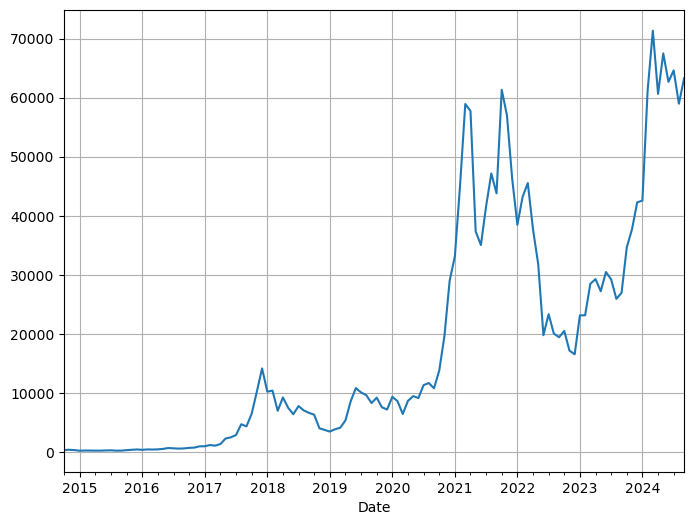

In [204]:
data.plot(figsize=(8, 6),
            grid=True)

Observamos un patrón alcista que ocurre cada 3-4 años (halving)

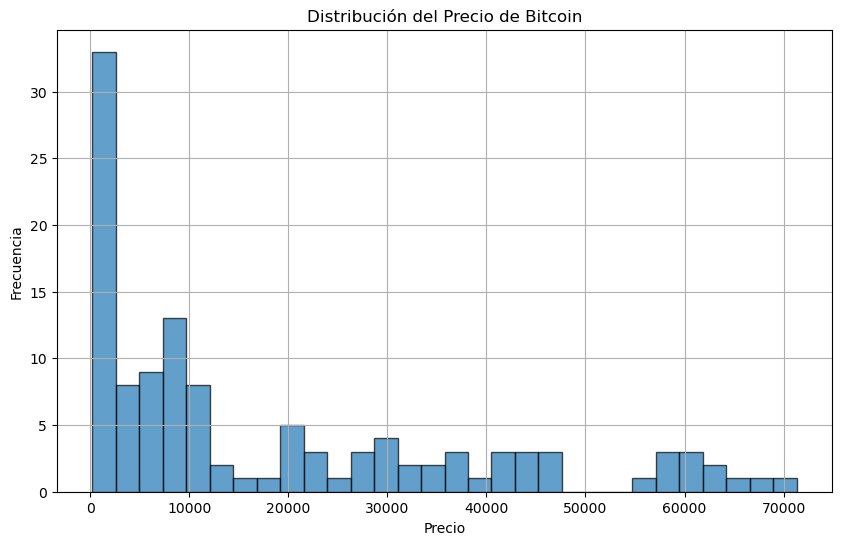

In [205]:
plt.figure(figsize=(10, 6))  
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución del Precio de Bitcoin')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.grid(True)
plt.show()

Ajustamos sumando 5 años para no tomar valores cercanos a 0

In [206]:
data1 = yf.download(stocks, start='2020-01-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


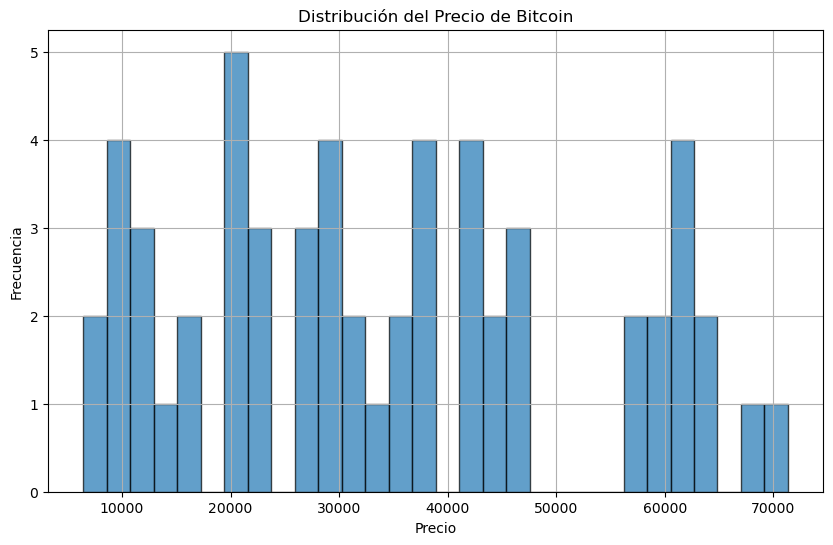

In [207]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.hist(data1, bins=30, edgecolor='black', alpha=0.7)  # Ajusta el número de bins según sea necesario
plt.title('Distribución del Precio de Bitcoin')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.grid(True)
plt.show()

Se observa que desde que se alejó del 0 cerca de 2019 ha oscilado en un rango de precios de $$20,000 a $60,000 en su mayoria 

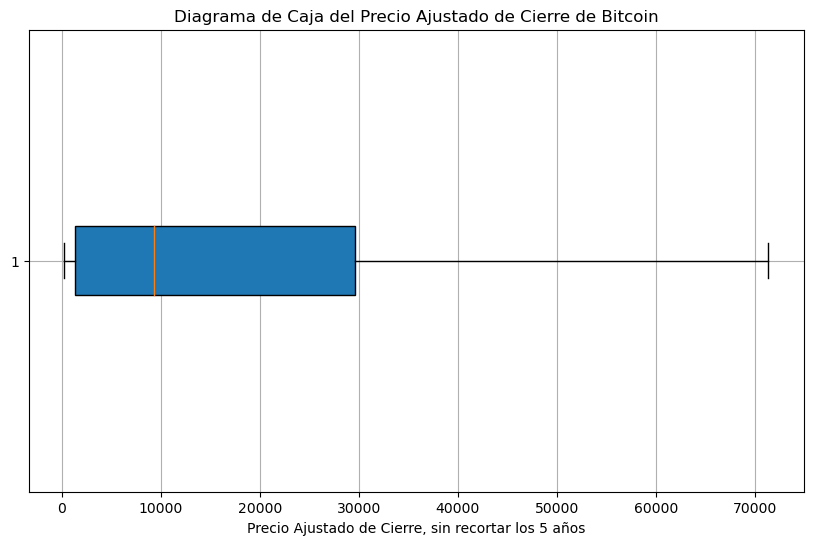

In [208]:
plt.figure(figsize=(10, 6))  
plt.boxplot(data, vert=False, patch_artist=True)  
plt.title('Diagrama de Caja del Precio Ajustado de Cierre de Bitcoin')
plt.xlabel('Precio Ajustado de Cierre, sin recortar los 5 años')
plt.grid(True)
plt.show()

Oscila dentro de 10,000 a 40,000

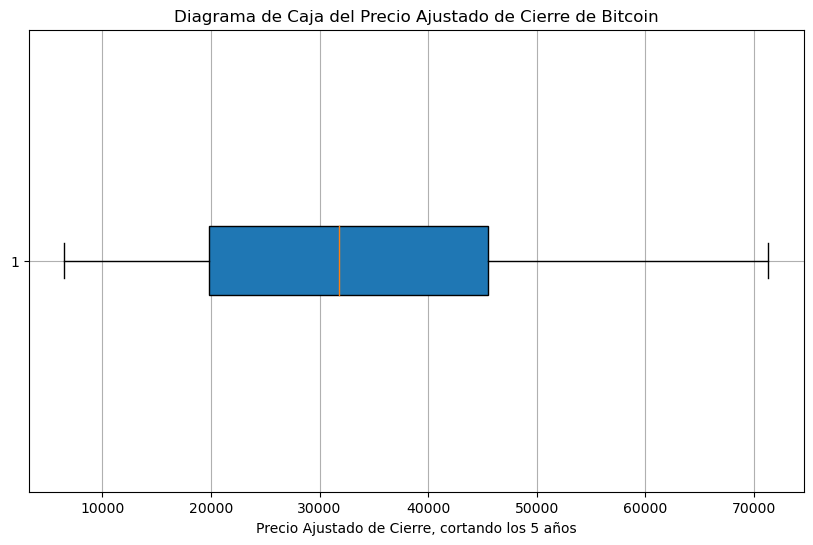

In [209]:
plt.figure(figsize=(10, 6))  
plt.boxplot(data1, vert=False, patch_artist=True)  
plt.title('Diagrama de Caja del Precio Ajustado de Cierre de Bitcoin')
plt.xlabel('Precio Ajustado de Cierre, cortando los 5 años')
plt.grid(True)
plt.show()

Oscila dentro de 20,000 a 45,000

In [210]:
data2 = yf.download(stocks, start='2023-01-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


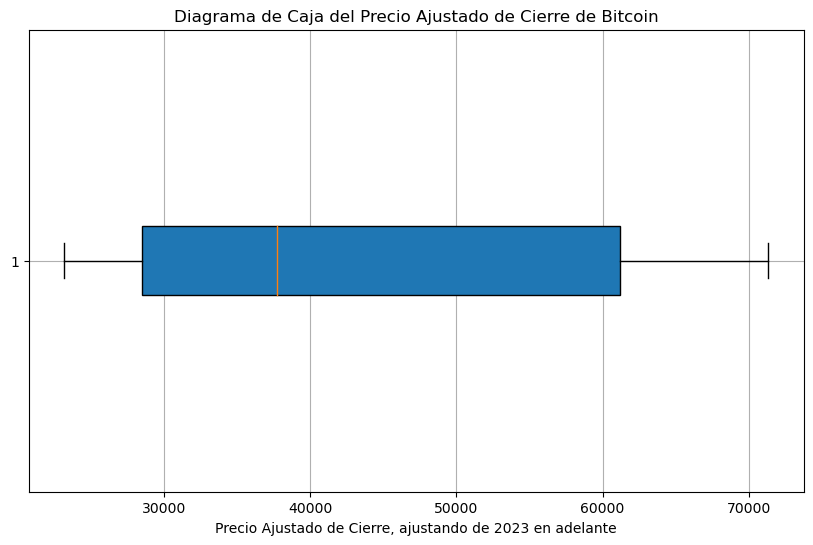

In [211]:
plt.figure(figsize=(10, 6))  
plt.boxplot(data2, vert=False, patch_artist=True)  
plt.title('Diagrama de Caja del Precio Ajustado de Cierre de Bitcoin')
plt.xlabel('Precio Ajustado de Cierre, ajustando de 2023 en adelante')
plt.grid(True)
plt.show()

Ajustando de 2023 en adelante observamos un comportamiento gradual, el box plot siempre va aumentando en este caso de 30,000 a 60,000. Aqui se empieza a observar el cambio.

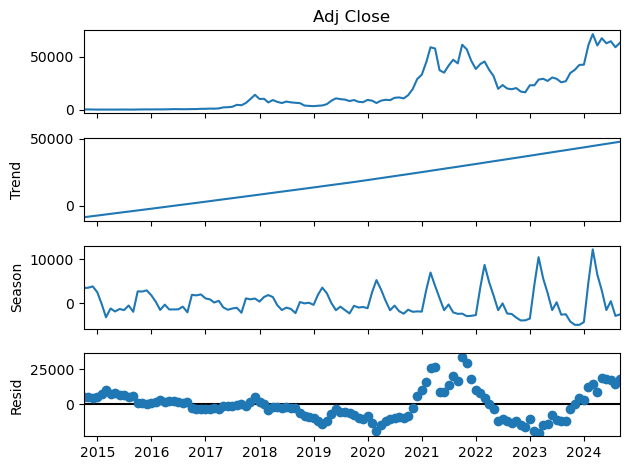

In [212]:
stl = STL(data, seasonal=37, trend=213)
res = stl.fit()
fig = res.plot()

<Axes: >

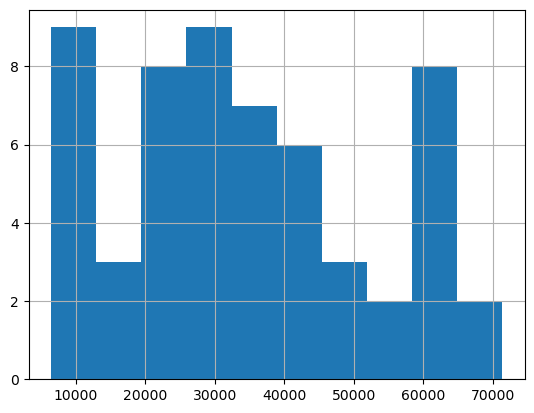

In [213]:
data1.hist()

MEAN

In [214]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = data.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([18292.715, 18292.715, 18292.715], dtype=float32)}

In [215]:
data.tail()

Date
2024-05-01    67491.414062
2024-06-01    62678.292969
2024-07-01    64619.250000
2024-08-01    58969.898438
2024-09-01    63268.929688
Name: Adj Close, dtype: float64

In [216]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-09-01', '2024-10-01', '2024-11-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)
pd.concat([data, Y_pred_df])
frame = pd.concat([data, Y_pred_df])
frame.columns = ['Values', 'mean_forecast']

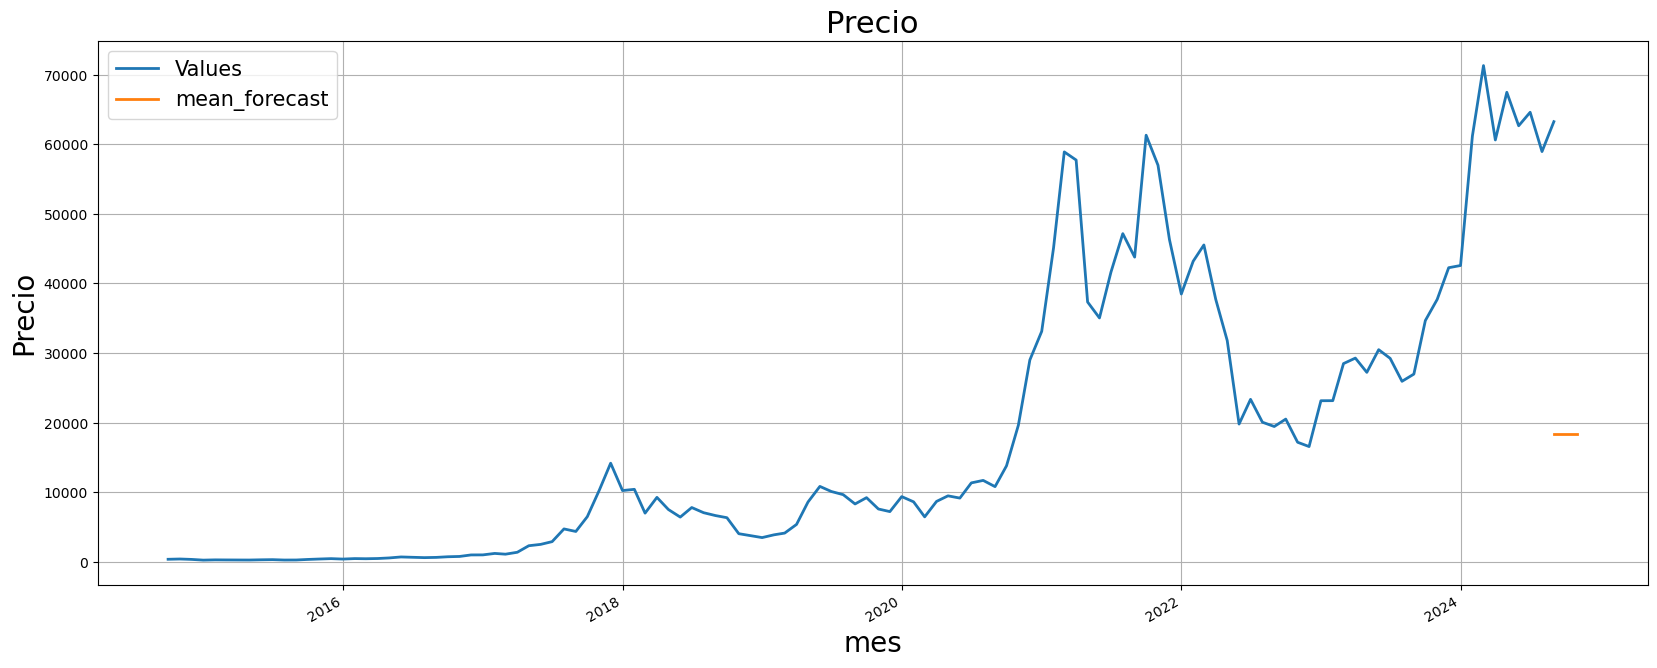

In [217]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio', fontsize=22)
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

NAIVE

In [218]:
# Define the model, fit and predict:
model = Naive()
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

Y_pred_df["naive_forecast"] = y_hat_dict["mean"]

SEASONAL NAIVE

In [219]:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

In [220]:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]

DRIFT

In [221]:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

In [222]:
Y_pred_df["drift_forecast"] = y_hat_dict["mean"]

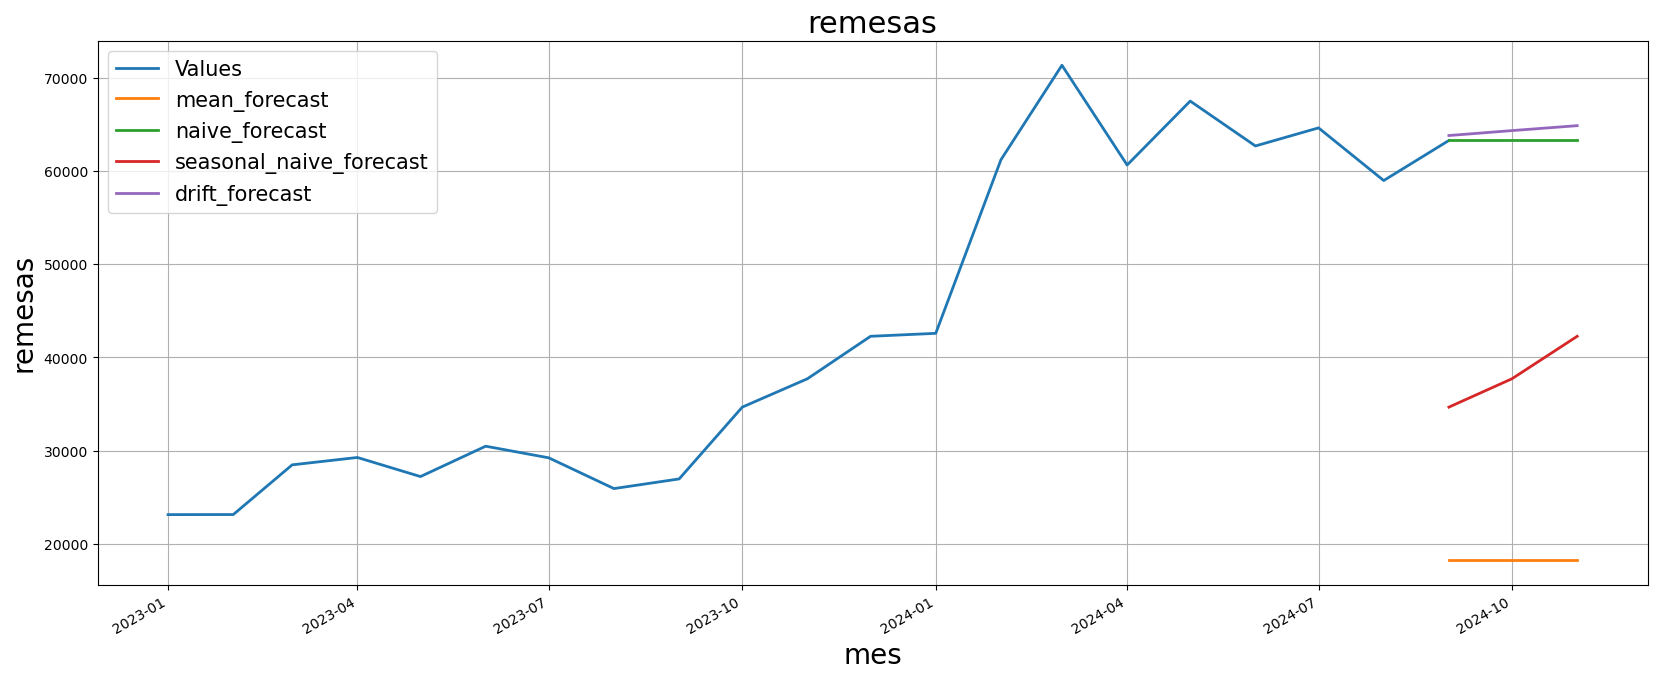

In [223]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

El mejor modelo de los 3 que se ajusta es el drift

In [224]:
Gold = ['GOLD']
datag = yf.download(Gold, start='2014-01-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [225]:
data,datag

(Date
 2014-10-01      338.321014
 2014-11-01      378.046997
 2014-12-01      320.192993
 2015-01-01      217.464005
 2015-02-01      254.263000
                   ...     
 2024-05-01    67491.414062
 2024-06-01    62678.292969
 2024-07-01    64619.250000
 2024-08-01    58969.898438
 2024-09-01    63268.929688
 Name: Adj Close, Length: 120, dtype: float64,
 Date
 2014-01-01    15.931019
 2014-02-01    16.839945
 2014-03-01    14.767915
 2014-04-01    14.469742
 2014-05-01    13.343303
                 ...    
 2024-05-01    16.906506
 2024-06-01    16.597914
 2024-07-01    18.418907
 2024-08-01    20.090641
 2024-09-01    20.209999
 Name: Adj Close, Length: 129, dtype: float64)

In [226]:
data = pd.DataFrame(data.values, columns=['Y'], index=data.index)
data.head()

,Y
Date,
2014-10-01,338.321014
2014-11-01,378.046997
2014-12-01,320.192993
2015-01-01,217.464005
2015-02-01,254.263000


In [227]:
data= data.join(datag)
data.head()

,Y,Adj Close
Date,,
2014-10-01,338.321014,9.889504
2014-11-01,378.046997,9.906170
2014-12-01,320.192993,8.991225
2015-01-01,217.464005,10.689100
2015-02-01,254.263000,10.889838


In [228]:
getattr(data.index, 'month_name')

data['mes'] = data.index.month_name()


In [229]:
data = pd.get_dummies(data, columns=['mes'], prefix="", prefix_sep="", drop_first=True, dtype=float)
data

,Y,Adj Close,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,
2014-10-01,338.321014,9.889504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2014-11-01,378.046997,9.906170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014-12-01,320.192993,8.991225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,217.464005,10.689100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-01,254.263000,10.889838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,67491.414062,16.906506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2024-06-01,62678.292969,16.597914,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2024-07-01,64619.250000,18.418907,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
fecha_2008 = pd.Series(data = [1], index=pd.to_datetime(["2016-01-01"]), name='2016_outlier')
fecha_2020 = pd.Series(data = [1], index=pd.to_datetime(["2020-06-06"]), name='2020_outlier')
     

In [231]:
data = data.join(fecha_2008).fillna(0)
data = data.join(fecha_2020).fillna(0)

In [232]:
fecha_2008

2016-01-01    1
Name: 2016_outlier, dtype: int64

In [233]:
data

,Y,Adj Close,August,December,February,January,July,June,March,May,November,October,September,2016_outlier,2020_outlier
Date,,,,,,,,,,,,,,,
2014-10-01,338.321014,9.889504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-11-01,378.046997,9.906170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2014-12-01,320.192993,8.991225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,217.464005,10.689100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-01,254.263000,10.889838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,67491.414062,16.906506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2024-06-01,62678.292969,16.597914,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-07-01,64619.250000,18.418907,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
data['lag1'] = data['Y'].shift(1)
data['lag2'] = data['Y'].shift(2)
data['lag3'] = data['Y'].shift(3)
data['lag4'] = data['Y'].shift(4)
data['lag5'] = data['Y'].shift(5)
data['lag6'] = data['Y'].shift(6)
data['lag7'] = data['Y'].shift(7)
data['lag8'] = data['Y'].shift(8)
data['lag9'] = data['Y'].shift(9)
data['lag10'] = data['Y'].shift(10)
data['lag11'] = data['Y'].shift(11)
data['lag12'] = data['Y'].shift(12)

In [235]:
data.head()

,Y,Adj Close,August,December,February,January,July,June,March,May,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,338.321014,9.889504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,378.046997,9.906170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01,320.192993,8.991225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,217.464005,10.689100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,338.321014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,254.263000,10.889838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,378.046997,338.321014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Aplica el modelo de regresión


In [246]:
data = data.dropna()

In [247]:
import statsmodels.api as sm
print(sm.OLS(data['Y'], data.drop(columns=['Y'])).fit().summary())


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              137.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                    2.91e-57
Time:                        18:43:43   Log-Likelihood:                         -1058.6
No. Observations:                 108   AIC:                                      2167.
Df Residuals:                      83   BIC:                                      2234.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [248]:
from sklearn.linear_model import LinearRegression
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])


0.9527284247963935

In [250]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).coef_


array([ 1.15125920e+02,  1.24075507e+03,  3.05358346e+03,  4.44713312e+03,
        1.91945757e+03,  2.90280619e+03, -9.69067383e+02,  3.62869162e+03,
       -4.10331182e+02,  7.25347494e+02,  4.44874114e+03,  9.54104847e+00,
       -4.89861320e+02,  4.54747351e-13,  1.12606503e+00, -1.74165747e-01,
        2.32583025e-03,  1.15568415e-01, -1.92161448e-01,  1.06425244e-01,
        1.64449658e-01, -8.55018904e-02, -1.08136607e-01, -1.18899985e-01,
        3.07531811e-01, -1.82616303e-01])

In [251]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).intercept_


-2469.2694284699537

In [252]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).feature_names_in_


array(['Adj Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2016_outlier', '2020_outlier', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'],
      dtype=object)

In [253]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).n_features_in_


26

In [255]:
errors = LinearRegression().fit(data.drop(columns=['Y']), data['Y']).predict(data.drop(columns=['Y'])) - data['Y']
errors.head()

Date
2015-10-01    2.663238e+03
2015-11-01   -1.092357e+03
2015-12-01    1.214447e+03
2016-01-01   -1.571925e-08
2016-02-01    3.253138e+03
Name: Y, dtype: float64

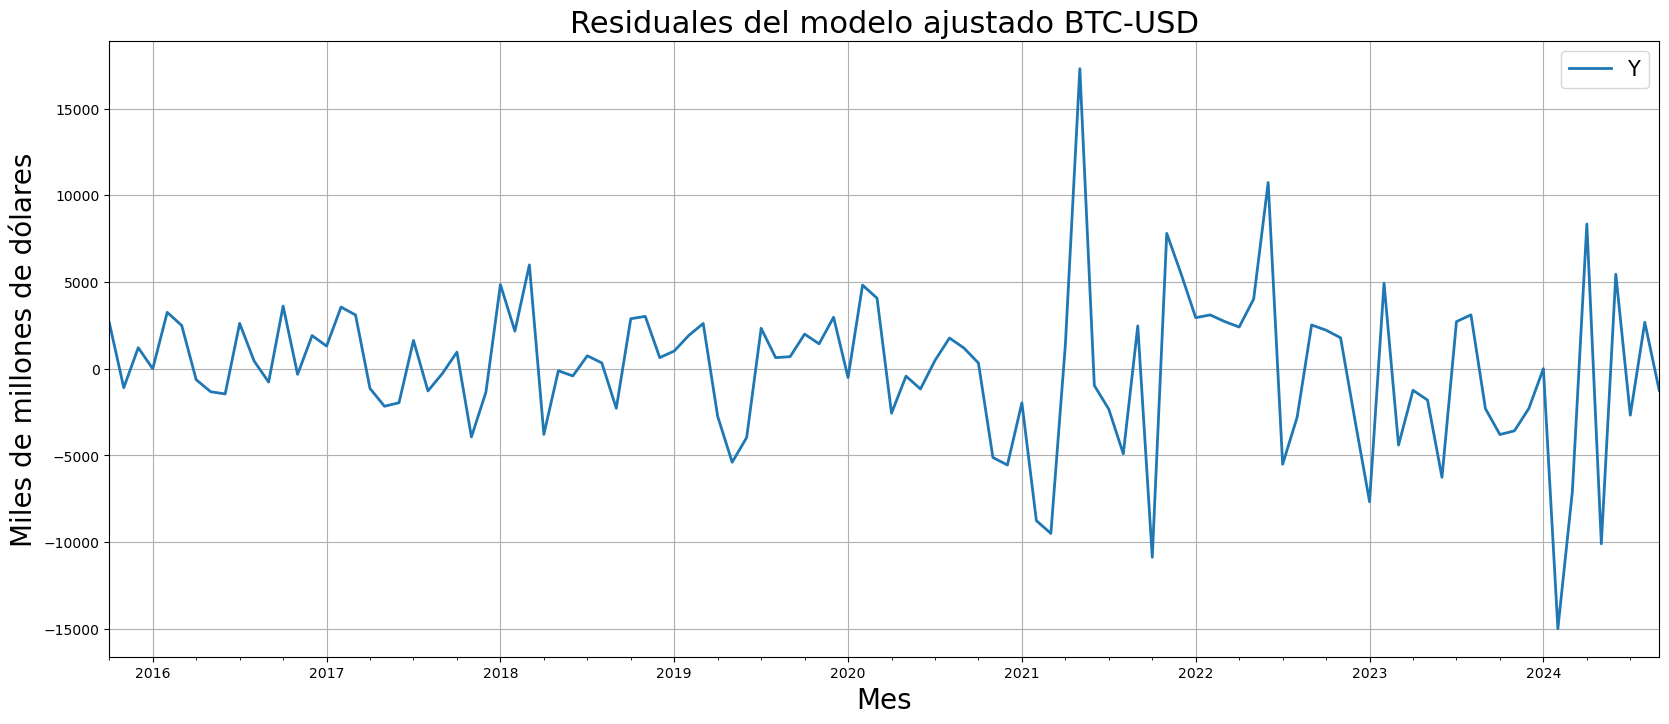

In [257]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado BTC-USD', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [258]:
errors.mean()


2.1221543041368327e-12

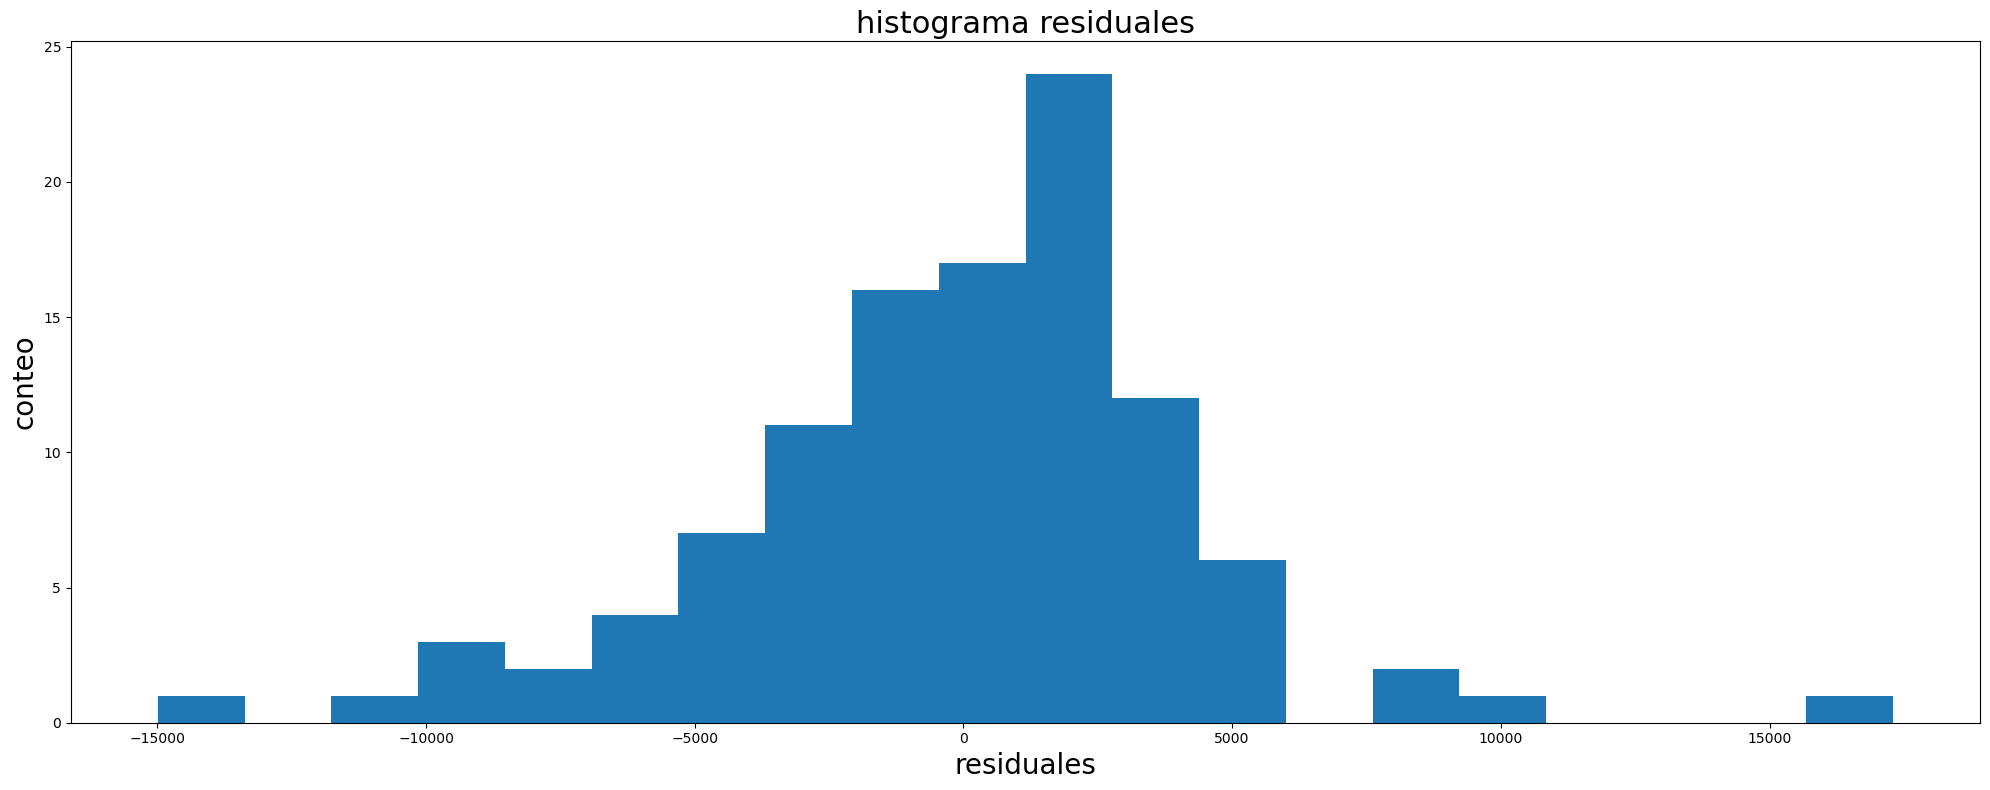

In [259]:

# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

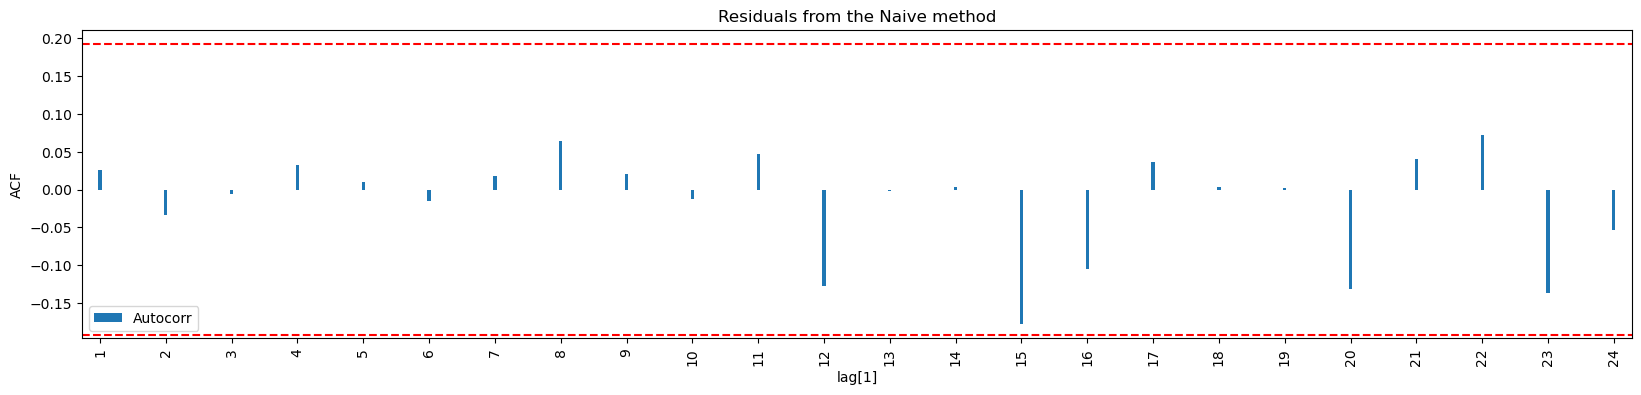

In [260]:
import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [261]:
data.shape

(108, 27)

In [264]:
import scipy as sp
sp.stats.boxcox(data['Y'])[0]

array([13.13657733, 13.95588245, 14.57064347, 13.85119556, 14.64859652,
       14.41656961, 14.76298451, 15.59446493, 16.81464317, 16.4200446 ,
       15.99698192, 16.29425295, 17.02939749, 17.36394442, 18.80963265,
       18.84977216, 20.01951259, 19.43692955, 20.84967178, 24.44124184,
       25.04061675, 26.15676173, 30.19933262, 29.50089213, 33.10254152,
       37.72168526, 41.33309826, 37.70864277, 37.89202527, 33.82292326,
       36.64638565, 34.52589546, 33.00772253, 34.89705555, 33.91146696,
       33.33102392, 32.87940635, 28.84807883, 28.25894726, 27.61260835,
       28.50320364, 29.03082827, 31.34570155, 35.87600413, 38.31779886,
       37.56652524, 37.07860312, 35.5380419 , 36.60021729, 34.6247415 ,
       34.1246687 , 36.76958688, 35.90571821, 33.05881895, 35.97562357,
       36.89232317, 36.5305133 , 38.81592669, 39.15762057, 38.28507212,
       41.02243257, 45.28547465, 50.46577955, 52.3462889 , 56.99607509,
       61.30207806, 60.96797152, 54.10256975, 53.16781123, 55.74

In [265]:
data_copy = data.copy()
data_copy['Y'] = sp.stats.boxcox(data['Y'])[0]

In [269]:
from sklearn.linear_model import LinearRegression
LinearRegression().fit(data_copy.drop(columns=['Y']), data_copy['Y']).score(data_copy.drop(columns=['Y']), data_copy['Y'])


0.851209530826036

In [270]:
predict = LinearRegression().fit(data_copy.drop(columns=['Y']), data['Y']).predict(data_copy.drop(columns=['Y'])) - data_copy['Y']


In [271]:
from scipy.special import inv_boxcox

In [275]:
lambda_val = sp.stats.boxcox(data_copy['Y'])[1]

In [279]:
inverted_predictios = inv_boxcox(predict, lambda_val)

In [280]:
error = predict - data['Y']

<Axes: xlabel='Date'>

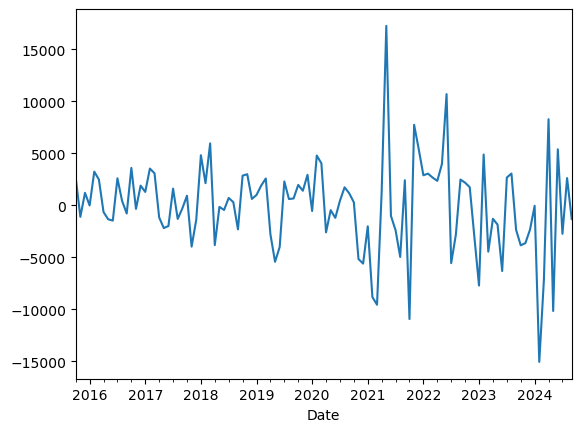

In [281]:
error.plot()